**codebasics_logistic_regression**






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [8]:
from google.colab import drive

In [10]:
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!ls /content/drive

MyDrive


In [20]:
df = pd.read_csv('/content/drive/MyDrive/Jupyter_Notebooks/homeprices.csv')

In [21]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


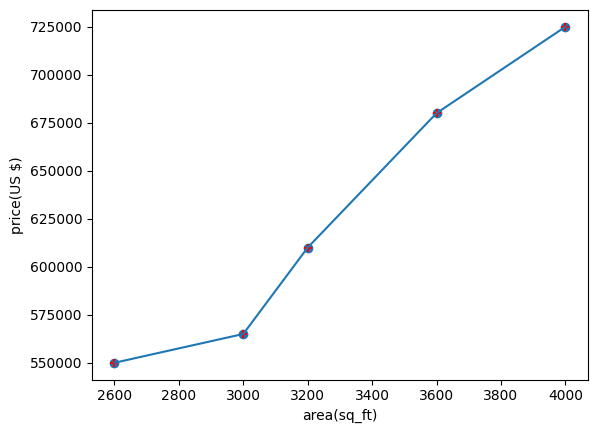

In [32]:
#now that I have checked my file. It contains two columns = area and prices.
#Lets draw the scatter plot to see the regression line from these points.
%matplotlib inline
plt.scatter(df.area,df.price)

#lets play some with scatter chart/plot by changing default color blue to red and default circles to stars along with x and y labels
plt.xlabel('area(sq_ft)')
plt.ylabel('price(US $)')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area, df.price) #just plotting the dots of area and price

In [47]:
#lets check coefficients, slope and intercept
#for this, lets fit the linear regression model on availale data of homeprice
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(df[['area']],df.price)

LinearRegression()

In [63]:
#model is fit meaning linear regression math will work on area and price.
#now I test few random areas for which model will predict the prices accordingly.
#like we can just write randomly or ask the user to input area and model will output predicted price.
lin_reg.predict([[3300]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [104]:
#Intercept(b = slope) and coefficient(m = corresponding cost of feature = area)
lin_reg.intercept_

np.float64(180616.43835616432)

In [105]:
lin_reg.coef_

array([135.78767123])

In [109]:
#checking with best fit line equation y=mx + b
y = (135.78767123 * 3300) + 180616.43835616432
print(y) #this ans should match with lin_reg.predict([[3300]])

628715.7534151643


In [51]:
#now lets give it some test data points of area via another csv file as area.csv and let model predict the prices
test_area = pd.read_csv('/content/drive/MyDrive/Jupyter_Notebooks/areas.csv')

In [52]:
test_area.head(3) #just to check the correctness of the areas file.

,area
0,1000
1,1500
2,2300


In [53]:
lin_reg.predict(test_area)  #I wll give test_area file to lin_reg model to predict prices for me relevant to the areas in the csv file

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [55]:
#lets save this new prices in new variable as p_p so that we can allign this p_p with new column as predicted_prices in test_area csv file
p_p = lin_reg.predict(test_area)

In [56]:
#then we will add one new column in test_area csv file to save the predicted prices given by lin_reg model.
test_area['predicted_prices'] = p_p

In [70]:
#lets check whether allignment is done properly
check3 = test_area.head(3)

In [62]:
#hurray....we have predicted_prices column as expected with p_p against areas of 1000,1500,2300 and so on.
#lets create new csv file named as PREDICTION.CSV using to_csv method of pandas library.
#But the index numbers 0,1,2,....so on are irrelevant. So we will just remove it by using index=False method.
test_area.to_csv('/content/drive/MyDrive/Jupyter_Notebooks/PREDICTION.CSV', index=False)

Text(0, 0.5, 'price(US $)')

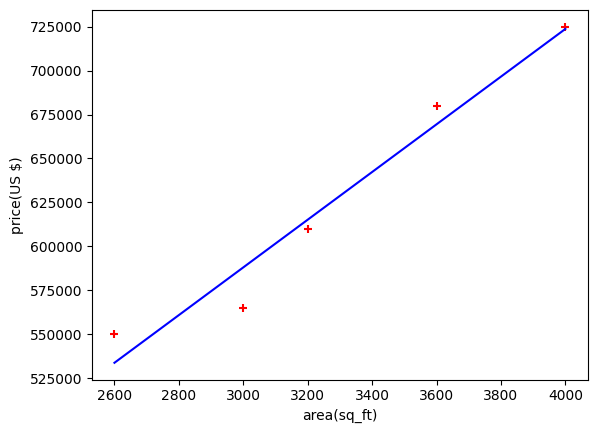

In [67]:
#finally, lets plot the predicted area via lin_reg model
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area, lin_reg.predict(df[['area']]),color='blue')
plt.xlabel('area(sq_ft)')
plt.ylabel('price(US $)')

Text(0, 0.5, 'price(US $)')

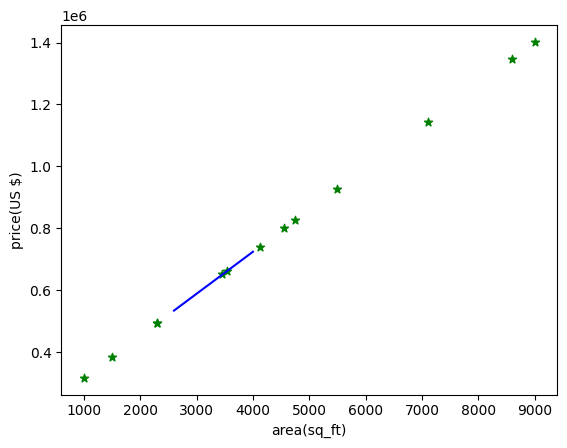

In [73]:
plt.scatter(test_area.area, test_area.predicted_prices,color='green',marker='*')
plt.plot(df.area, lin_reg.predict(df[['area']]),color='blue')
plt.xlabel('area(sq_ft)')
plt.ylabel('price(US $)')

# **Time for practice with different csv file. Lets do it on our own with file - 'canada_per_capita_income,csv'**

In [78]:
#Lets go with communication flow this time to grab the concept
#step1: import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
#step2: providing our file 'canada_per_capita_income.csv' to dataframe
cana_income = pd.read_csv('/content/drive/MyDrive/Jupyter_Notebooks/canada_per_capita_income.csv')

In [95]:
#Step3: Check the correctness of this file
cana_income.head(3)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


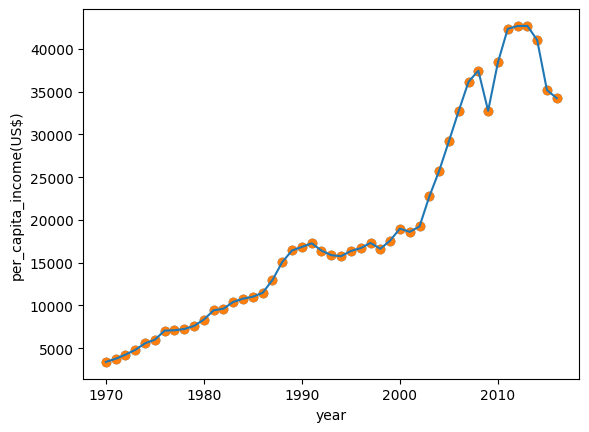

In [134]:

#step4: scatter plot of existing using matplot lib
%matplotlib inline
plt.scatter(cana_income.year,cana_income['per capita income (US$)'])
plt.xlabel('year')
plt.scatter(cana_income.year,cana_income['per capita income (US$)'])
plt.xlabel('year')
plt.ylabel('per_capita_income(US$)')
plt.plot(cana_income.year, cana_income['per capita income (US$)'])

In [102]:
#step5: calling linear regression model from sklearn libraray and fitting it with existing data
#step5: calling linear regression model from sklearn libraray and fitting it with existing data
from sklearn import linear_model
lin_reg_canada = linear_model.LinearRegression()
lin_reg_canada.fit(cana_income[['year']],cana_income['per capita income (US$)'])

LinearRegression()

In [103]:
#step6: checking model with any random year to check model income predicion
lin_reg_canada.predict([[2020]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [111]:
#step7: checking with y=mx+b
#intercept =slope = b = fixed cost and coefficient of area
lin_reg_canada.intercept_

np.float64(-1632210.7578554575)

In [112]:
lin_reg_canada.coef_

array([828.46507522])

In [115]:
#checking with math y=mx+b
y = (828.46507522*2020) + (-1632210.7578554575)
print(y) #this is matching with lin_reg_canada.predict([[2020]])

41288.694088942604


''However, theres is one interesting point to note is that slope=intecept is negative -13632210.7578554575. How is this possible in a real life business situation. Coz slope is fixed cost. Solution with logic to this interesting cross-over is given at the end of this canada per capita model.''

In [118]:
#lets go to step no 8: providing our test data to model by converting our test data = canada_pci_testdata_for_prediction.csv to dataframe
test_income = pd.read_csv('/content/drive/MyDrive/Jupyter_Notebooks/canada_pci_testdata_for_prediction.csv')
lin_reg_canada.predict(test_income[['year']])

array([38803.29886875, 39631.76394397, 40460.22901919, 41288.69409442,
       42117.15916964, 42945.62424486, 43774.08932009, 44602.55439531,
       45431.01947053, 46259.48454575, 47087.94962098, 47916.4146962 ,
       48744.87977142, 49573.34484664])

In [122]:
#lets save this newly predicted income per capita in prediction file
p_per_c = lin_reg_canada.predict(test_income[['year']])

In [123]:
test_income['predicted_per_capita'] = p_per_c

In [127]:
test_income.head(3)

,year,,predicted_per_capita
0,2017,NaN,38803.298869
1,2018,NaN,39631.763944
2,2019,NaN,40460.229019


In [140]:
#showing path to save the new file created by to_csv code
test_income.to_csv('/content/drive/MyDrive/Jupyter_Notebooks/prediction_income.csv')

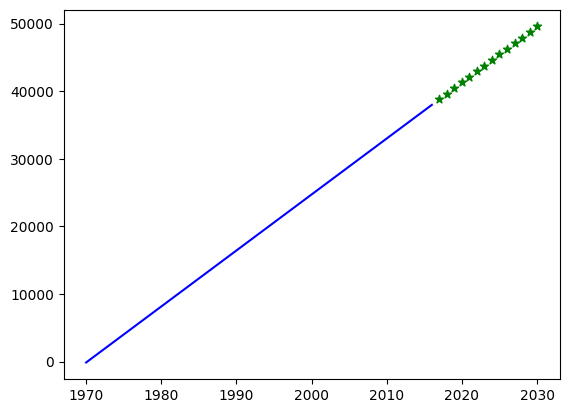

In [141]:
#Finally, plotting the result with linear regression best fit line and predicted per capita income points
plt.scatter(test_income.year, test_income.predicted_per_capita,color='green',marker='*')
plt.plot(cana_income.year, lin_reg_canada.predict(cana_income[['year']]),color='blue')

now, lets solve this negative coefficient issue.

In [144]:
#idea is to change the base year from 0 (assumed by model) to starting year of our data 1970.
cana_income['Year_new'] = cana_income['year'] - 1970
#thats it. Now you have to replace 'year' with 'Year_new' at the places to give its effect.

#I would recommend you to do it and comment/write in the space the correct positive coefficient.